In [1]:
from captcha_competition.data import load_raw_data, generate_captcha_image, cleaned_image, best_of_both_worlds, preprocessing, remove_bg
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

X_train, y_train, X_val, y_val = load_raw_data()

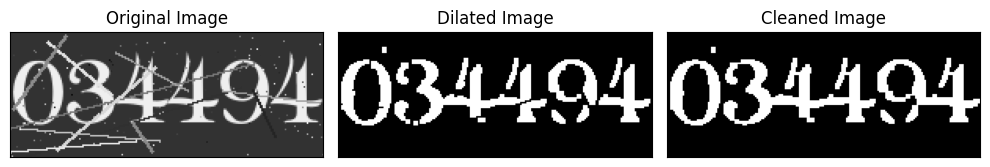

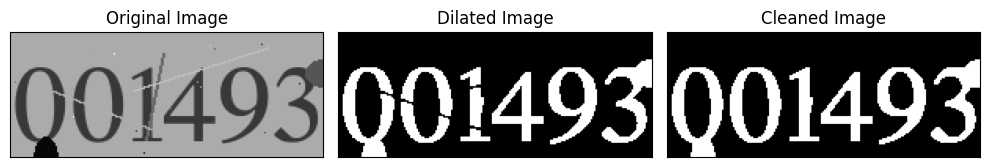

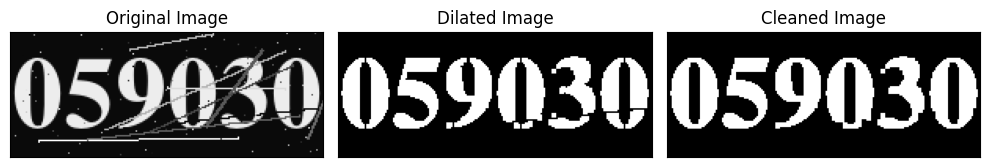

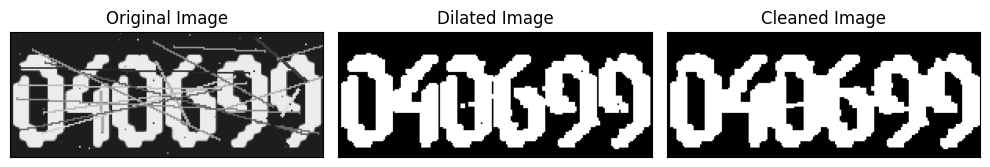

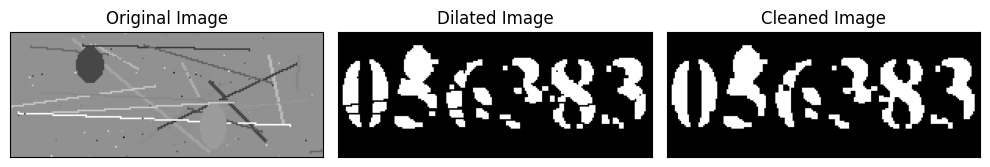

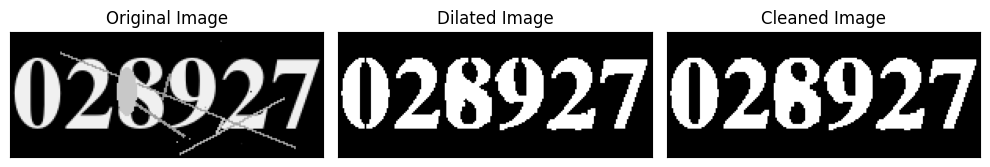

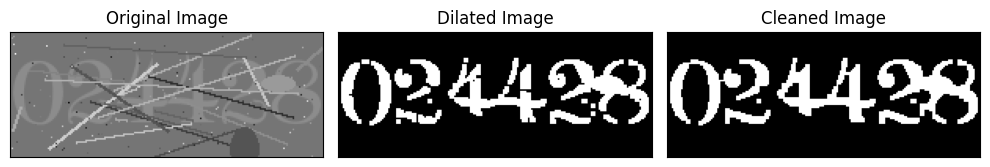

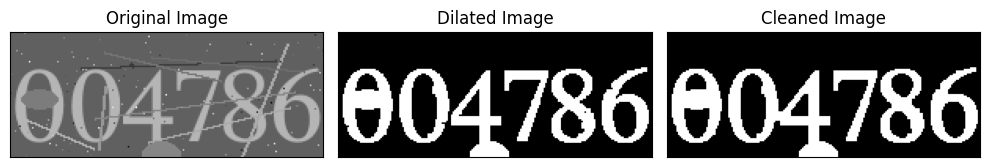

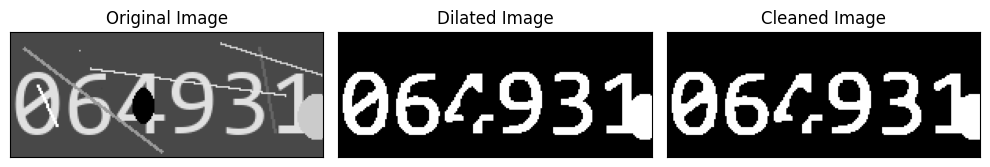

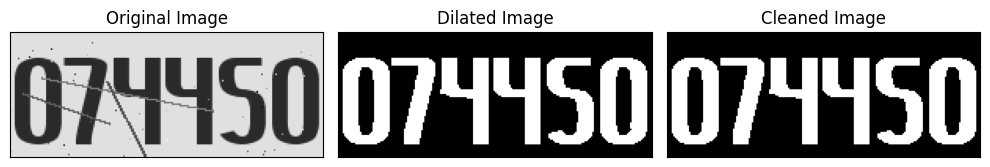

In [25]:
for i in range(10):
    
    index = random.randrange(10000)
    
    image = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY)
    
    # Binarize
    # Top most left pixel is the background color
    background_color = image[0,0]
    # If the background color is dark and the text is light
    if background_color < 128:
        ret, binary = cv2.threshold(image, background_color, 255, cv2.THRESH_BINARY)
    # If the background color is light and the text is dark
    else:
        ret, binary = cv2.threshold(image, background_color-1, 255, cv2.THRESH_BINARY_INV)
    
     # Close the image: dilate and then erode to remove dots and lines
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    # Display both the original and binary images
    plt.figure(figsize=(10, 6))

    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(132)
    plt.imshow(dilated, cmap='gray')
    plt.title('Dilated Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(133)
    plt.imshow(cleaned, cmap='gray')
    plt.title('Cleaned Image')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

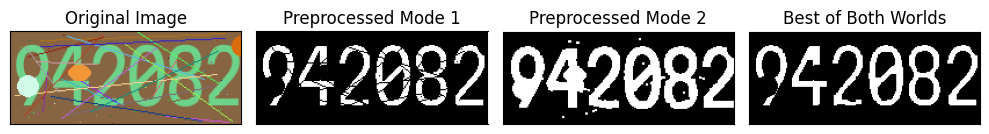

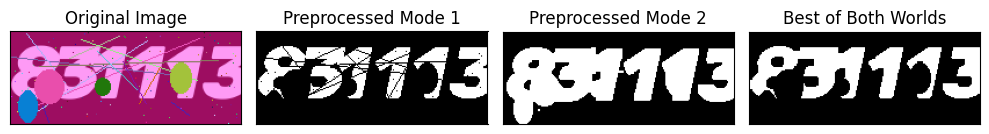

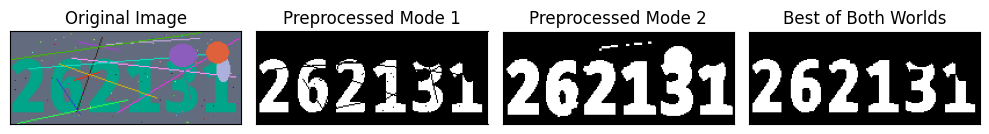

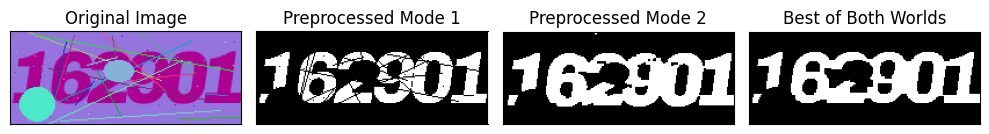

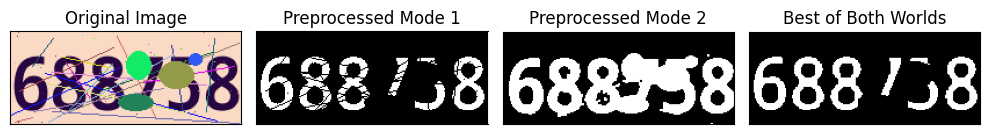

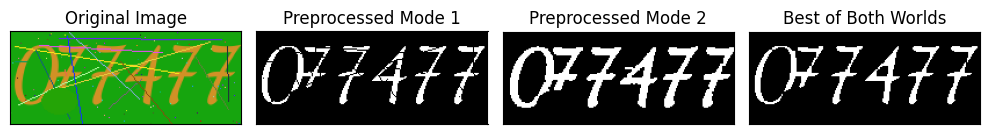

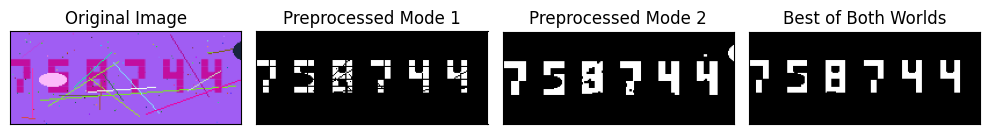

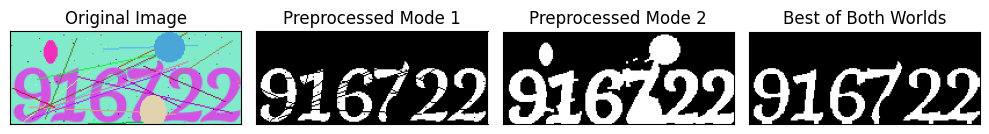

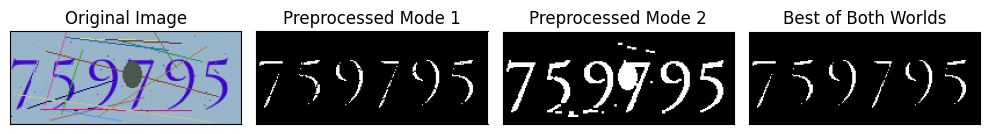

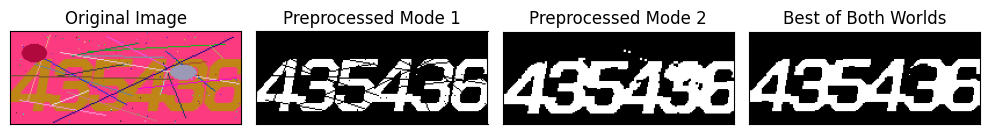

In [2]:
for i in range(10):
    img = generate_captcha_image()
    new_image = remove_bg(img[0])
    new_image2 = cleaned_image(img[0])
    new_image3 = best_of_both_worlds(img[0])

    plt.figure(figsize=(10, 6))

    plt.subplot(141)
    plt.imshow(img[0], cmap='gray')
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(142)
    plt.imshow(new_image, cmap='gray')
    plt.title('Preprocessed Mode 1')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(143)
    plt.imshow(new_image2, cmap='gray')
    plt.title('Preprocessed Mode 2')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(144)
    plt.imshow(new_image3, cmap='gray')
    plt.title('Best of Both Worlds')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()

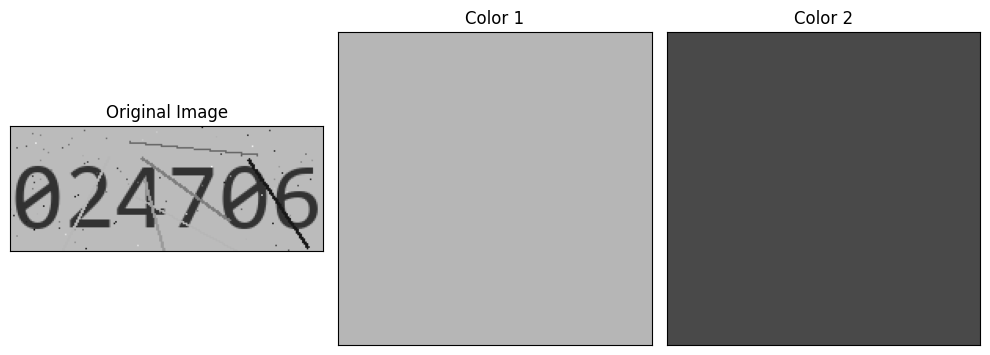

Color 1: 182
Color 2: 73


In [27]:
def most_common_colors(image):
  # Divide the image into 10x10 windows.
  windows = np.lib.stride_tricks.as_strided(image, shape=(image.shape[0] // 10, image.shape[1] // 10, 10, 10), strides=(image.shape[1] * 10, 10, image.shape[1], 1))
  # Calculate the most common color in each window.
  color_counter = np.array([Counter(window.flatten()) for window in windows])
  # Calculate the most common color in the image.
  color_mode = [value for value, frequency in color_counter.sum(axis=0).most_common(2)]
  # Return the two most common colors.
  return color_mode


def show_colors(image, colors):

  plt.figure(figsize=(10, 6))

  plt.subplot(131)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.xticks([]), plt.yticks([])

  color_1 = np.ones((80, 80), dtype=int) * colors[0]
  plt.subplot(132)
  plt.imshow(color_1, cmap='gray', vmin=0, vmax=255)
  plt.title('Color 1')
  plt.xticks([]), plt.yticks([])

  color_2 = np.ones((80, 80), dtype=int) * colors[1]
  plt.subplot(133)
  plt.imshow(color_2, cmap='gray', vmin=0, vmax=255)
  plt.title('Color 2')
  plt.xticks([]), plt.yticks([])

  plt.tight_layout()
  plt.show()
  
  print(f'Color 1: {colors[0]}')
  print(f'Color 2: {colors[1]}')
  
  return colors

# Image
image = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)

# Show the image and the two most common colors
colors = show_colors(image, most_common_colors(image))

(([], []), ([], []))

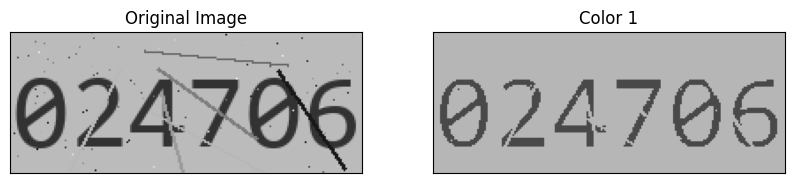

In [28]:
def binarize(image, colors):
    # Copy the image
    new_image = np.copy(image)
    # Change everything that is not the second most common color (text) to the first most common color (background)
    new_image[(new_image != colors[1])] = colors[0]
    # Return the binarized image
    return new_image

image = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(binarize(image, colors), cmap='gray', vmin=0, vmax=255)
plt.title('Color 1')
plt.xticks([]), plt.yticks([])

In [29]:
def solution(image):
  
  # Convert the image to grayscale
  image = cv2.cvtColor(image[0], cv2.COLOR_BGR2GRAY)
  
  # Divide the image into 10x10 windows.
  windows = np.lib.stride_tricks.as_strided(image, shape=(image.shape[0] // 10, image.shape[1] // 10, 10, 10), strides=(image.shape[1] * 10, 10, image.shape[1], 1))
  # Calculate the most common color in each window.
  color_counter = np.array([Counter(window.flatten()) for window in windows])
  # Calculate the most common color in the image.
  color_mode = [value for value, frequency in color_counter.sum(axis=0).most_common(2)]
  # Copy the image
  new_image = np.copy(image)
  # Change everything that is not the second most common color (text) to the first most common color (background)
  new_image[(new_image != color_mode[1])] = color_mode[0]
  # Convert the image to binary
  if color_mode[0] > color_mode[1]:
    _, new_image = cv2.threshold(new_image, min(color_mode), 255, cv2.THRESH_BINARY)
  else:
    _, new_image = cv2.threshold(new_image, min(color_mode), 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((4, 4), np.uint8)
  new_image = cv2.morphologyEx(new_image, cv2.MORPH_OPEN, kernel)
  
  plt.figure(figsize=(10, 6))

  plt.subplot(121)
  plt.imshow(image, cmap='gray')
  plt.title('Original Image')
  plt.xticks([]), plt.yticks([])

  plt.subplot(122)
  plt.imshow(new_image, cmap='gray', vmin=0, vmax=255)
  plt.title('Cleaned image')
  plt.xticks([]), plt.yticks([])

  # Return the binarized image
  return new_image

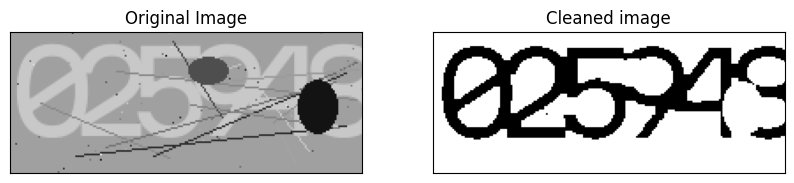

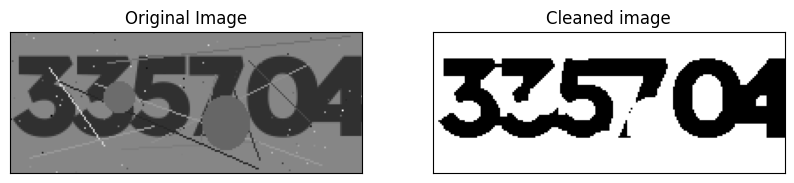

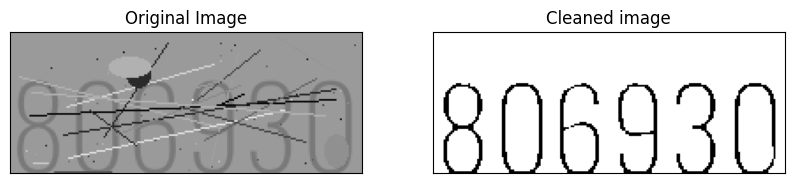

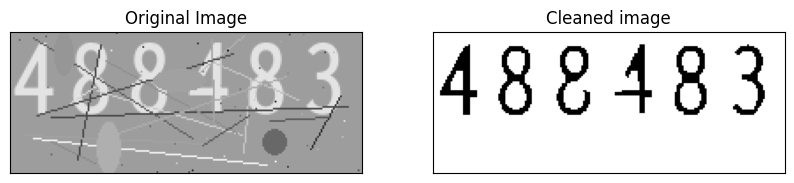

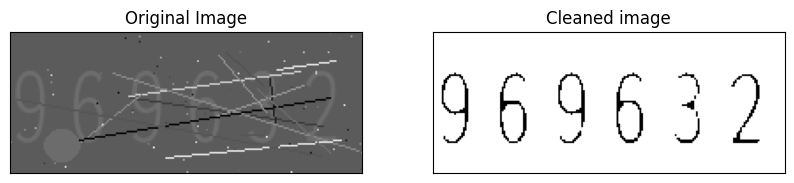

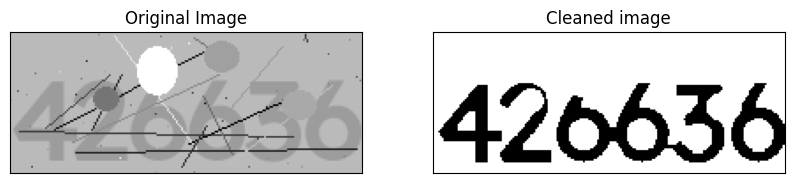

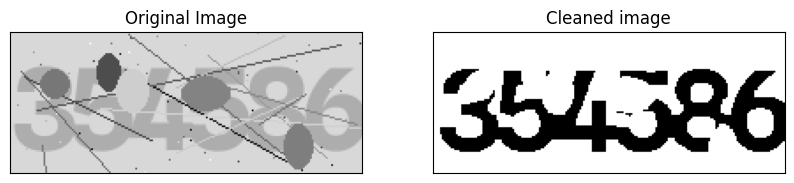

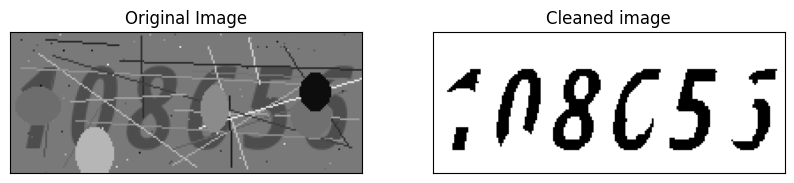

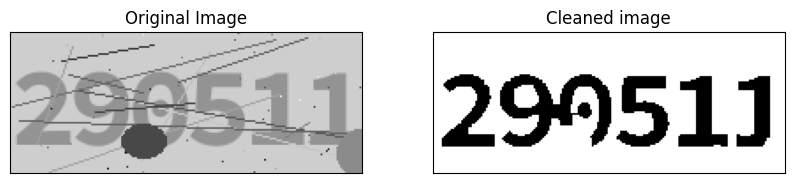

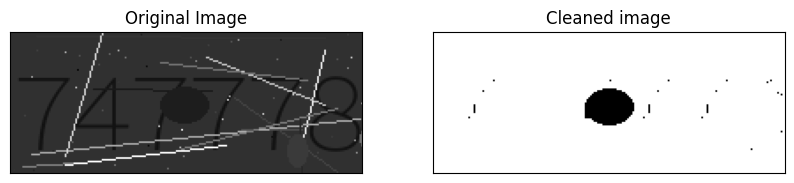

In [30]:
for i in range(10):
    img = generate_captcha_image()
    solution(img)

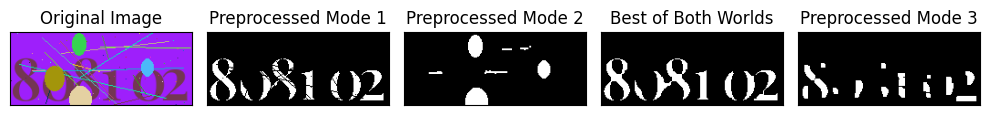

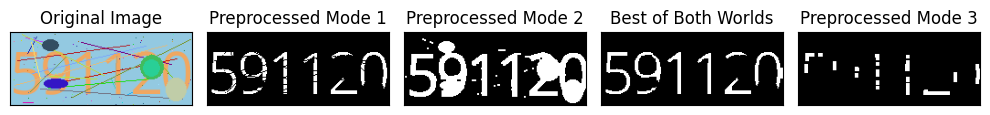

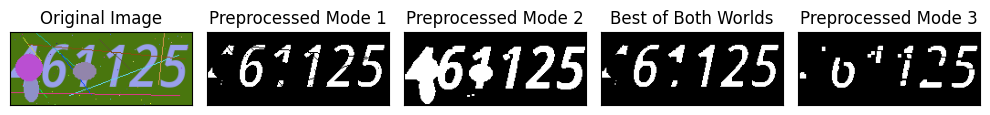

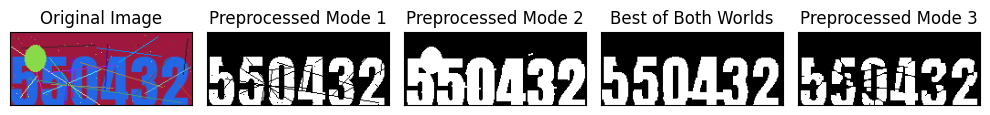

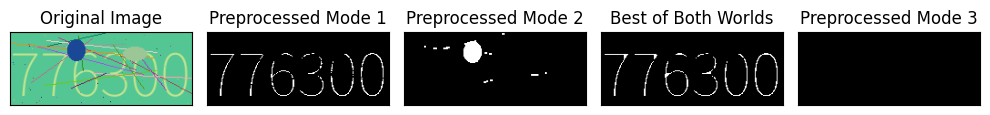

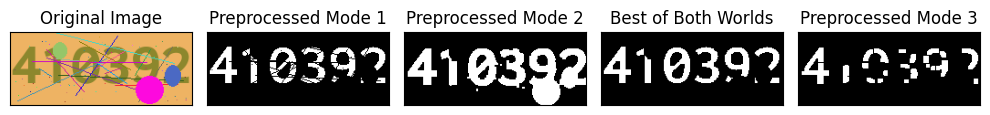

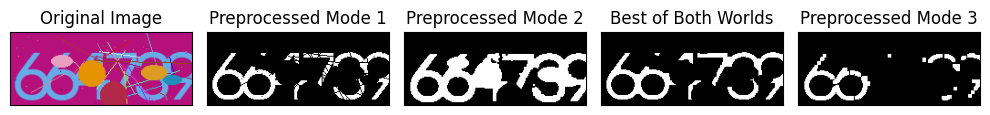

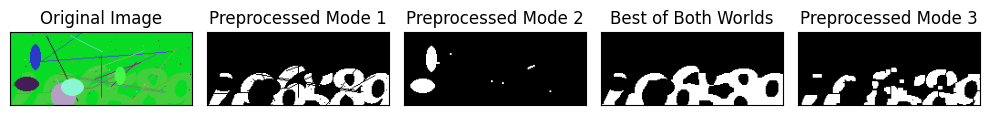

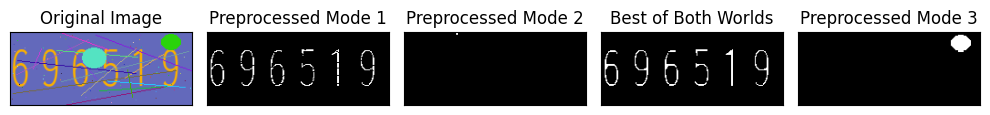

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x107c36990>>
Traceback (most recent call last):
  File "/Users/carlota/Library/Caches/pypoetry/virtualenvs/captcha-competition-AVM7rXwv-py3.11/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


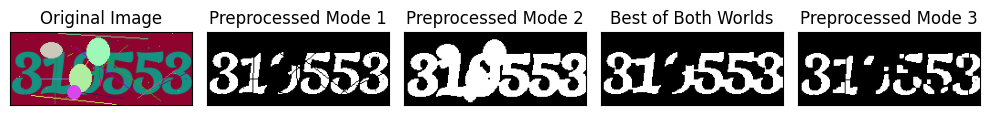

In [4]:
from captcha_competition.data import remove_bg, cleaned_image, best_of_both_worlds, preprocessing
from captcha_competition.data import generate_captcha_image
import matplotlib.pyplot as plt

for i in range(10):
    img = generate_captcha_image()
    new_image = remove_bg(img[0])
    new_image2 = cleaned_image(img[0])
    new_image3 = best_of_both_worlds(img[0])
    new_image4 = preprocessing(img[0])

    plt.figure(figsize=(10, 6))

    plt.subplot(151)
    plt.imshow(img[0], cmap='gray')
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(152)
    plt.imshow(new_image, cmap='gray')
    plt.title('Preprocessed Mode 1')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(153)
    plt.imshow(new_image2, cmap='gray')
    plt.title('Preprocessed Mode 2')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(154)
    plt.imshow(new_image3, cmap='gray')
    plt.title('Best of Both Worlds')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(155)
    plt.imshow(new_image4, cmap='gray')
    plt.title('Preprocessed Mode 3')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()